**Ejemplo 5.5 del libro "Simulación: un enfoque práctico" de Raúl Coss Bu**

Los factores estacionales para cada mes del año son:

In [136]:
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
# Crear una lista para los meses del año
meses = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Generar una lista para el factor estacional
factor = [1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40]

# Crear un DataFrame con los meses y los números aleatorios
tabla = pd.DataFrame({
    'Mes': meses,
    'Factores estacionales': factor
})

In [138]:
# Definir la función que devuelve el factor estacional dado un número de mes
def factor_estacional(mes):
    # Verificar si el mes está en el rango correcto
    if 1 <= mes <= 12:
        # Devolver el factor estacional correspondiente
        return factor[mes - 1]

In [140]:
# Simular valores de la demanda
def simular_demanda():
    # Generar un número aleatorio
    U1 = rnd.random()
    # Definir los límites superiores y los valores de x correspondientes
    rango = [(0.01, 35), (0.025, 36), (0.045, 37), (0.065, 38), (0.087, 39),
        (0.11, 40), (0.135, 41), (0.162, 42), (0.19, 43), (0.219, 44),
        (0.254, 45), (0.299, 46), (0.359, 47), (0.424, 48), (0.494, 49),
        (0.574, 50), (0.649, 51), (0.719, 52), (0.784, 53), (0.844, 54),
        (0.894, 55), (0.934, 56), (0.964, 57), (0.98, 58), (0.995, 59), (1.0, 60)]

    # Buscar el rango correspondiente
    for limite, valor in rango:
        if U1 < limite:
            x = valor
            break

    return x, U1

In [141]:
# Simular los tiempos de entrega
def tiempo_entrega():
    # Generar un número aleatorio
    U2 = rnd.random()
    if 0 <= U2 < 0.3:
      t = 1
    elif 0.3 <= U2 < 0.7:
      t = 2
    else:
      t = 3

    return t, U2

In [196]:
resultados = []

# Definir el inventario inicial y el nivel de reorden
inventario_inicial = 150
nivel_reorden = 100

# Variable para rastrear cuándo se realizará la entrega
meses_espera = 0

# Ejecutar la simulación 12 veces
for i in range(12):
    x, U1 = simular_demanda()

    # Restar el valor correspondiente del inventario inicial
    demanda_ajustada_inicial = round(x * factor_estacional(1 + i))
    inventario_final = inventario_inicial - demanda_ajustada_inicial

    # Evaluar si el inventario final es menor que el nivel de reorden y no hay un pedido en curso
    nivel_de_reorden_alcanzado = 0
    tiempo_U = None
    tiempo_X = None

    if inventario_final < nivel_reorden and meses_espera == 0:
        nivel_de_reorden_alcanzado = 1
        tiempo_X, tiempo_U = tiempo_entrega()
        meses_espera = tiempo_X

    # Calcular el valor absoluto según la condición
    valor_absoluto = abs(inventario_final) if inventario_final <= 0 else 0

    # Ajustar el inventario final si es negativo
    if inventario_final < 0:
        inventario_final = 0

    promedio = round((inventario_inicial)**2 / (2*demanda_ajustada_inicial)) if inventario_final == 0 else round((inventario_inicial + inventario_final) / 2)

    resultados.append((inventario_inicial, U1, demanda_ajustada_inicial, inventario_final,
                       valor_absoluto, nivel_de_reorden_alcanzado, tiempo_U, tiempo_X, promedio))

    # Si hay un pedido en curso, reducir el contador de meses de espera y ajustar el inventario inicial cuando llegue el pedido
    if meses_espera > 0:
        meses_espera -= 1
        if meses_espera == 0:
            inventario_inicial = inventario_final + 200
        else:
            inventario_inicial = inventario_final
    else:
        inventario_inicial = inventario_final

# Crear un DataFrame de pandas para mostrar los resultados en una tabla
df = pd.DataFrame(resultados, columns=['Inv. inicial', 'Núm. aleatorio', 'Demanda ajustada', 'Inv. final',
                                       'Faltante', 'Orden', 'Núm. aleatorio', 'Tiempo de entrega (meses)', 'Inv. mensual promedio'])

df['Mes'] = np.arange(1, len(df) + 1)

print(df.to_string(index=False))

 Inv. inicial  Núm. aleatorio  Demanda ajustada  Inv. final  Faltante  Orden  Núm. aleatorio  Tiempo de entrega (meses)  Inv. mensual promedio  Mes
          150        0.447913                59          91         0      1        0.792936                        3.0                    120    1
           91        0.057157                38          53         0      0             NaN                        NaN                     72    2
           53        0.914679                50           3         0      0             NaN                        NaN                     28    3
          203        0.159143                34         169         0      0             NaN                        NaN                    186    4
          169        0.276577                37         132         0      0             NaN                        NaN                    150    5
          132        0.791177                38          94         0      1        0.679344                    

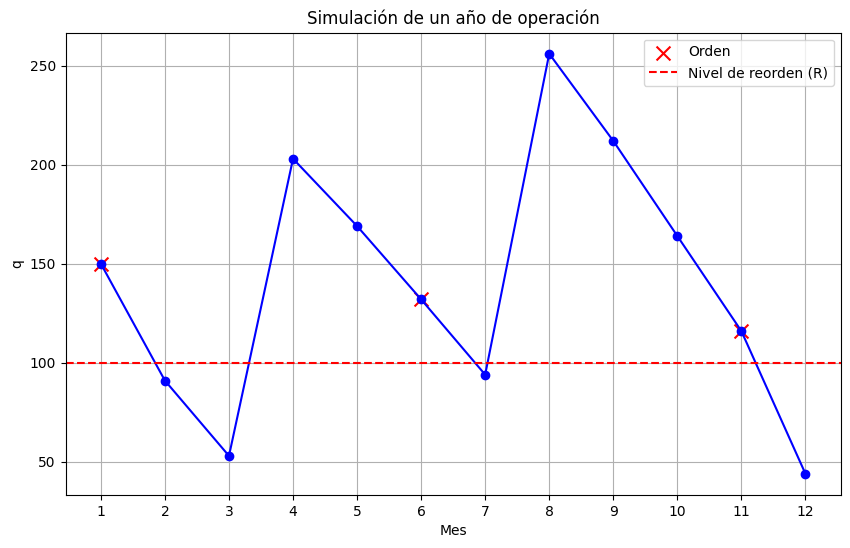

In [197]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df['Mes'], df['Inv. inicial'], marker='o', linestyle='-', color='b')

# Agregar marcadores para los meses con nivel de reorden alcanzado
reorder_months = df[df['Orden'] == 1]['Mes']
reorder_values = df[df['Orden'] == 1]['Inv. inicial']
plt.scatter(reorder_months, reorder_values, color='r', marker='x', s=100, label='Orden')

# Agregar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('q')
plt.title('Simulación de un año de operación')

plt.axhline(y=100, color='r', linestyle='--', label='Nivel de reorden (R)')
plt.xticks(np.arange(1, 13))
plt.grid(True)
plt.legend()
plt.show()

La información con respecto a los costos es:

In [200]:
# Costos totales anuales

orden = 100 # Costo por orden
inventario = 20 # Costo de unidad por año
faltante = 50 # Costo por unidad

costos_orden = sum(df['Orden'])* orden
costos_inventario = sum(df['Inv. mensual promedio'])*inventario
costos_faltante = sum(df['Faltante'])*faltante

print("Costo de ordenar:", costos_orden)
print("Costo de llevar inventario:", costos_inventario)
print("Costo de faltante:", costos_faltante)
print("Costos totales: ", costos_orden + costos_inventario + costos_faltante)

Costo de ordenar: 300
Costo de llevar inventario: 28000
Costo de faltante: 1350
Costos totales:  29650
